In [25]:
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
import cv2
import pickle as pkl
import numpy as np
from tqdm.notebook import tqdm
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.callbacks import LearningRateScheduler
from efficientnet.keras import EfficientNetB0
from efficientnet.keras import EfficientNetB1
from efficientnet.keras import EfficientNetB2
from keras.applications.mobilenet import MobileNet
from sklearn.model_selection import train_test_split

In [3]:
with open('X_ver2.pickle', 'rb') as f:
    X = pkl.load(f)
    
with open('Y_ver2.pickle', 'rb') as f:
    Y = pkl.load(f)

In [4]:
index = np.array([i for i in range(X.shape[0])])

In [8]:
X_train, X_test, index_train, index_test = train_test_split(X, index, test_size=0.2, random_state=42)

In [9]:
y_train = np.zeros((X_train.shape[0], 136), dtype = np.uint8)
for i in range(X_train.shape[0]):
    y_train[i, :] = Y[index_train[i], :]

In [10]:
y_test = np.zeros((X_test.shape[0], 136), dtype = np.uint8)
for i in range(X_test.shape[0]):
    y_test[i, :] = Y[index_test[i], :]

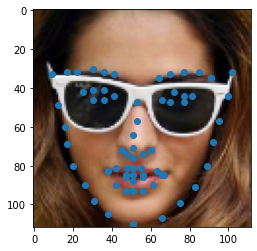

In [15]:
per = 3423
plt.imshow(X_train[per])
kp2 = y_train[per, :].reshape(68, 2)
plt.scatter(kp2[:, 0], kp2[:, 1])
plt.show()

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [16]:
mobileNet_v2 = MobileNetV2(input_shape=(112, 112, 3), classes=68*2, weights=None)
out_ = mobileNet_v2.layers[-2].output
out_ = Dense(68*2, activation ='linear')(out_)
model = Model(inputs = mobileNet_v2.input, outputs = out_)
callback = LearningRateScheduler(lambda epoch : 1e-3 if epoch < 30 else 1e-4)
model.compile(optimizer=Adam(), loss = 'mse')
model.fit(X_train, y_train, epochs = 60, callbacks = [callback], validation_data=(X_val, y_val))

Train on 145587 samples, validate on 16177 samples
Epoch 1/60
145587/145587 [==============================] - 674s 5ms/step - loss: 52.6191 - val_loss: 30.2236
Epoch 2/60
145587/145587 [==============================] - 654s 4ms/step - loss: 7.9013 - val_loss: 55.9857
Epoch 3/60
145587/145587 [==============================] - 654s 4ms/step - loss: 5.9190 - val_loss: 72.2339
Epoch 4/60
145587/145587 [==============================] - 654s 4ms/step - loss: 4.9601 - val_loss: 21.5307
Epoch 5/60
145587/145587 [==============================] - 656s 5ms/step - loss: 4.2321 - val_loss: 27.0852
Epoch 6/60
145587/145587 [==============================] - 653s 4ms/step - loss: 3.7792 - val_loss: 8.6228
Epoch 7/60
145587/145587 [==============================] - 653s 4ms/step - loss: 3.5365 - val_loss: 6.3279
Epoch 8/60
145587/145587 [==============================] - 653s 4ms/step - loss: 3.2926 - val_loss: 6.8020
Epoch 9/60
145587/145587 [==============================] - 656s 5ms/step - los

In [17]:
with open('MobileNetV2', 'wb') as f:
    model.save_weights(f)

In [18]:
mobileNet = MobileNet(input_shape=(112, 112, 3), classes=68*2, weights=None)
out_1 = mobileNet.layers[-2].output
out_1 = Dense(68*2, activation ='linear')(out_1)
model = Model(inputs = mobileNet.input, outputs = out_1)
model.compile(optimizer=Adam(), loss = 'mse')
model.fit(X_train, y_train, epochs = 60, callbacks = [callback], validation_data=(X_val, y_val))

Train on 145587 samples, validate on 16177 samples
Epoch 1/60
145587/145587 [==============================] - 480s 3ms/step - loss: 34.0572 - val_loss: 15.6532
Epoch 2/60
145587/145587 [==============================] - 472s 3ms/step - loss: 7.7133 - val_loss: 8.0092
Epoch 3/60
145587/145587 [==============================] - 472s 3ms/step - loss: 5.5870 - val_loss: 5.9253
Epoch 4/60
145587/145587 [==============================] - 472s 3ms/step - loss: 4.4738 - val_loss: 4.7997
Epoch 5/60
145587/145587 [==============================] - 472s 3ms/step - loss: 3.8284 - val_loss: 4.3097
Epoch 6/60
145587/145587 [==============================] - 472s 3ms/step - loss: 3.3023 - val_loss: 8.5317
Epoch 7/60
145587/145587 [==============================] - 471s 3ms/step - loss: 3.1106 - val_loss: 4.6956
Epoch 8/60
145587/145587 [==============================] - 472s 3ms/step - loss: 2.6924 - val_loss: 6.1625
Epoch 9/60
145587/145587 [==============================] - 472s 3ms/step - loss: 2

In [19]:
with open('MobileNet', 'wb') as f:
    model.save_weights(f)

In [20]:
efficient_net = EfficientNetB0(input_shape=(112, 112, 3), classes=68*2, weights=None)
out_2 = efficient_net.layers[-2].output
out_2 = Dense(68*2, activation ='linear')(out_2)
model = Model(inputs = efficient_net.input, outputs = out_2)
model.compile(optimizer=Adam(), loss = 'mse')
model.fit(X_train, y_train, epochs = 60, callbacks = [callback], validation_data=(X_val, y_val))

Train on 145587 samples, validate on 16177 samples
Epoch 1/60
145587/145587 [==============================] - 849s 6ms/step - loss: 85.7945 - val_loss: 17.3543
Epoch 2/60
145587/145587 [==============================] - 830s 6ms/step - loss: 10.2807 - val_loss: 8.1379
Epoch 3/60
145587/145587 [==============================] - 831s 6ms/step - loss: 8.0513 - val_loss: 6.0790
Epoch 4/60
145587/145587 [==============================] - 830s 6ms/step - loss: 6.7369 - val_loss: 7.2598
Epoch 5/60
145587/145587 [==============================] - 831s 6ms/step - loss: 5.9040 - val_loss: 5.3112
Epoch 6/60
145587/145587 [==============================] - 830s 6ms/step - loss: 5.4612 - val_loss: 4.5470
Epoch 7/60
145587/145587 [==============================] - 831s 6ms/step - loss: 5.0678 - val_loss: 4.6994
Epoch 8/60
145587/145587 [==============================] - 830s 6ms/step - loss: 4.7240 - val_loss: 4.4691
Epoch 9/60
145587/145587 [==============================] - 832s 6ms/step - loss: 

In [21]:
with open('EfficientNetB0', 'wb') as f:
    model.save_weights(f)

In [23]:
efficient_net_b1 = EfficientNetB1(input_shape=(112, 112, 3), classes=68*2, weights=None)
out_3 = efficient_net_b1.layers[-2].output
out_3 = Dense(68*2, activation ='linear')(out_3)
model = Model(inputs = efficient_net_b1.input, outputs = out_3)
model.compile(optimizer=Adam(), loss = 'mse')
model.fit(X_train, y_train, epochs = 60, callbacks = [callback], validation_data=(X_val, y_val))

Train on 145587 samples, validate on 16177 samples
Epoch 1/60
145587/145587 [==============================] - 1137s 8ms/step - loss: 84.6460 - val_loss: 14.0208
Epoch 2/60
145587/145587 [==============================] - 1115s 8ms/step - loss: 11.7294 - val_loss: 10.6813
Epoch 3/60
145587/145587 [==============================] - 1114s 8ms/step - loss: 8.8500 - val_loss: 7.0927
Epoch 4/60
145587/145587 [==============================] - 1114s 8ms/step - loss: 7.3889 - val_loss: 7.7551
Epoch 5/60
145587/145587 [==============================] - 1116s 8ms/step - loss: 6.3131 - val_loss: 5.9395
Epoch 6/60
145587/145587 [==============================] - 1117s 8ms/step - loss: 5.6255 - val_loss: 5.2822
Epoch 7/60
145587/145587 [==============================] - 1117s 8ms/step - loss: 5.2237 - val_loss: 4.4372
Epoch 8/60
145587/145587 [==============================] - 1117s 8ms/step - loss: 4.8552 - val_loss: 4.5251
Epoch 9/60
145587/145587 [==============================] - 1115s 8ms/ste

In [24]:
with open('EfficientNetB1', 'wb') as f:
    model.save_weights(f)

In [26]:
efficient_net_b2 = EfficientNetB2(input_shape=(112, 112, 3), classes=68*2, weights=None)
out_4 = efficient_net_b2.layers[-2].output
out_4 = Dense(68*2, activation ='linear')(out_4)
model = Model(inputs = efficient_net_b2.input, outputs = out_4)
model.compile(optimizer=Adam(), loss = 'mse')
model.fit(X_train, y_train, epochs = 60, callbacks = [callback], validation_data=(X_val, y_val))

Train on 145587 samples, validate on 16177 samples
Epoch 1/60
145587/145587 [==============================] - 1169s 8ms/step - loss: 89.1676 - val_loss: 17.5581
Epoch 2/60
145587/145587 [==============================] - 1144s 8ms/step - loss: 13.1608 - val_loss: 9.8063
Epoch 3/60
145587/145587 [==============================] - 1143s 8ms/step - loss: 10.3117 - val_loss: 8.9592
Epoch 4/60
145587/145587 [==============================] - 1143s 8ms/step - loss: 8.4896 - val_loss: 6.2317
Epoch 5/60
145587/145587 [==============================] - 1144s 8ms/step - loss: 7.4160 - val_loss: 5.5826
Epoch 6/60
145587/145587 [==============================] - 1142s 8ms/step - loss: 6.5942 - val_loss: 5.2718
Epoch 7/60
145587/145587 [==============================] - 1142s 8ms/step - loss: 6.1547 - val_loss: 4.9045
Epoch 8/60
145587/145587 [==============================] - 1142s 8ms/step - loss: 5.7947 - val_loss: 4.2558
Epoch 9/60
145587/145587 [==============================] - 1143s 8ms/ste

In [27]:
with open('EfficientNetB2', 'wb') as f:
    model.save_weights(f)